In [9]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
import pydotplus 
from IPython.display import Image
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import scipy

In [10]:
#GET DATA and MAKE DATAFRAME
col_list=['Pelvic Incidence','Pelvic Tilt',
                     'Lumbar Lordosis Angle','Sacral Slope',
                     'Pelvic Radius','Grade of Spondylolisthesis', 'class']

df_complete = pd.read_csv("VCDS.csv", header=None, names=col_list)

In [11]:
df=df_complete.drop('class',axis=1)

In [12]:
x=scipy.stats.zscore(df)
arr=np.abs(x)
bool_arr=(arr<3).all(axis=1)
df=df[bool_arr]
df_complete=df_complete[bool_arr]
df_complete=df_complete['class']

In [13]:
df_complete.value_counts()

SL    138
NO    100
DH     60
Name: class, dtype: int64

In [14]:
len(df_complete)

298

Text(0, 0.5, 'merging distance values')

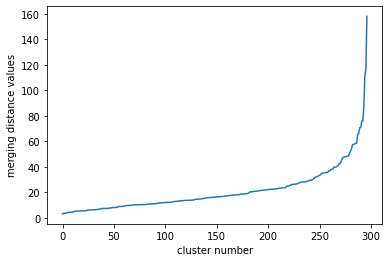

In [15]:
Z = linkage(df, 'complete')
plt.plot(list(range(len(Z))),Z[:,2])
plt.xlabel('cluster number')
plt.ylabel('merging distance values')

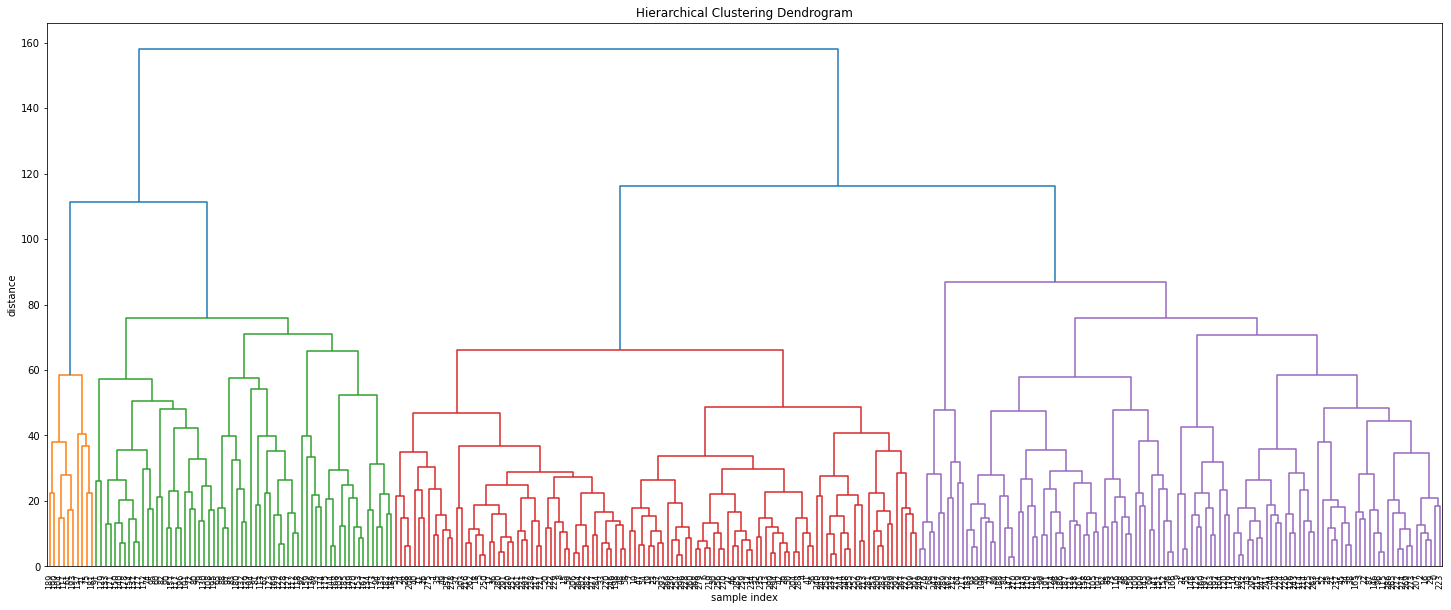

In [16]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [17]:
k=3
soln=fcluster(Z, k, criterion='maxclust')
soln

array([3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3,
       3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2], dtype=i

In [18]:
print(pd.Series(soln).value_counts())
print(pd.Series(soln[(df_complete=='SL')]).value_counts())
print(pd.Series(soln[(df_complete=='DH')]).value_counts())
print(pd.Series(soln[(df_complete=='NO')]).value_counts())

3    112
2    112
1     74
dtype: int64
1    74
3    64
dtype: int64
2    41
3    19
dtype: int64
2    71
3    29
dtype: int64


In [19]:
print(df_complete[soln==1].value_counts())
print(df_complete[soln==2].value_counts())
print(df_complete[soln==3].value_counts())

SL    74
Name: class, dtype: int64
NO    71
DH    41
Name: class, dtype: int64
SL    64
NO    29
DH    19
Name: class, dtype: int64


In [20]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

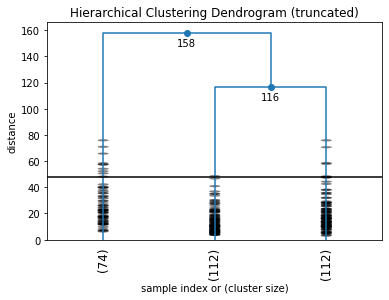

In [21]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=3,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10, 
    max_d=48,# useful in small plots so annotations don't overlap
)
plt.show()

In [22]:
len(df_complete[df_complete=='SL'])

138

In [23]:
km = KMeans(n_clusters=3)
km.fit(df)
km.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=i

In [24]:
print(pd.Series(km.labels_[df_complete=='SL']).value_counts())
print(pd.Series(km.labels_[df_complete=='DH']).value_counts())
print(pd.Series(km.labels_[df_complete=='NO']).value_counts())

2    71
1    56
0    11
dtype: int64
0    58
2     2
dtype: int64
0    89
2    11
dtype: int64


In [25]:
print(pd.Series(km.labels_).value_counts())
print(df_complete[km.labels_==0].value_counts())
print(df_complete[km.labels_==1].value_counts())
print(df_complete[km.labels_==2].value_counts())

0    158
2     84
1     56
dtype: int64
NO    89
DH    58
SL    11
Name: class, dtype: int64
SL    56
Name: class, dtype: int64
SL    71
NO    11
DH     2
Name: class, dtype: int64
